# Lab 8: PageRank

In this assignment, we will learn how to compute the importance score of nodes in a graph by using the PageRank method.

## Generate a graph

Here, we use [NetworkX](https://networkx.org/) to generate a directed graph. Then, we will apply PageRank method to this graph. 

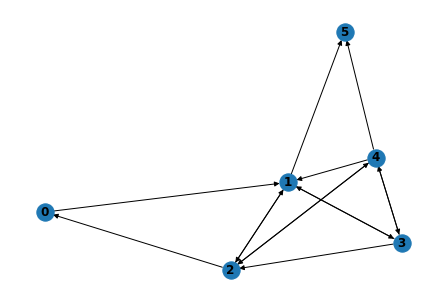

#nodes: 6, #edges: 14
node-0, #in_degrees 1, #out_degrees 1
node-1, #in_degrees 4, #out_degrees 3
node-2, #in_degrees 3, #out_degrees 3
node-3, #in_degrees 2, #out_degrees 3
node-4, #in_degrees 2, #out_degrees 4
node-5, #in_degrees 2, #out_degrees 0
[[0 1 0 0 0 0]
 [0 0 1 1 0 1]
 [1 1 0 0 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [0 0 0 0 0 0]]


In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


# generate a directed graph from the given adjacency matrix
A = np.array([[0, 1, 0, 0, 0, 0],
             [0, 0, 1, 1, 0, 1],
             [1, 1, 0, 0, 1, 0],
             [0, 1, 1, 0, 1, 0],
             [0, 1, 1, 1, 0, 1],
             [0, 0, 0, 0, 0, 0]])

G = nx.from_numpy_matrix(A, create_using=nx.DiGraph)

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

print('#nodes: {}, #edges: {}'.format(G.number_of_nodes(), G.number_of_edges()))

# output the in_degrees and out_degrees of each node
for idx in range(G.number_of_nodes()):
    print('node-{}, #in_degrees {}, #out_degrees {}'.format(idx, G.in_degree(idx), G.out_degree(idx)))

# get the adjacency matrix of graph G
Adj = nx.adjacency_matrix(G).todense()
print(Adj)

## Task 1. Build the transition matrix from the adjacency matrix

In [12]:
# your code to get the transition matrix M
trans_mat = Adj/Adj.sum(axis=1)
trans_mat = np.nan_to_num(trans_mat, nan=1/6)
trans_mat = trans_mat.T
print(trans_mat)

[[0.         0.         0.33333333 0.         0.         0.16666667]
 [1.         0.         0.33333333 0.33333333 0.25       0.16666667]
 [0.         0.33333333 0.         0.33333333 0.25       0.16666667]
 [0.         0.33333333 0.         0.         0.25       0.16666667]
 [0.         0.         0.33333333 0.33333333 0.         0.16666667]
 [0.         0.33333333 0.         0.         0.25       0.16666667]]
<ipython-input-12-2d0d2ae8414d>:2: RuntimeWarning: invalid value encountered in true_divide
  trans_mat = Adj/Adj.sum(axis=1)


## Task 2. Use the power iteration method to compute the importance score of nodes


* Initialization: initialize the importance score vector $r_{0}=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]$.
* Iterate: $r_{t+1} =  M r_{t}$
* Stop when $\|r_{t+1} - r_{t}\|_1\leq \epsilon$


In [13]:
# your code
r0 = np.full((6,1),1/6)
e = 0.01
r_prev = r0
r_new = None
con = True
while con:
    r_new = np.dot(trans_mat, r_prev)
    if np.linalg.norm(r_new-r_prev, ord=1) < e:
        con = False
    r_prev = r_new

print(r_new)

[[0.09110877]
 [0.26835483]
 [0.1996744 ]
 [0.15007883]
 [0.14070433]
 [0.15007883]]


## Task 3. In the given graph, are there any dead ends?

If there are some dead ends in the given graph, please use the Random Teleports method to re-compute the importance score. In particular, please construct a new transition matrix as follows,

$$G = \beta M + (1-\beta)[\frac{1}{6}]_{6\times 6}$$

Here, $0<\beta<1$. Apply the power iteration method to $G$. Compare the obtained importance score with that obtained in Task 2. 

In [14]:
# your code

# There is a dead end in the given graph, where at node #5 there is no out links
# The newly computed important score is very similar to that in Task 2,
# setting the beta randomly between 0 and 1 in each iteration could be a better approach.

beta = 0.8
tem_mat = np.full((6,6), 1/6)
new_trans_mat = beta*trans_mat+(1-beta)*tem_mat

r0 = np.full((6,1),1/6)
e = 0.01
r_prev = r0
r_new = None
con = True
while con:
    r_new = np.dot(new_trans_mat, r_prev)
    if np.linalg.norm(r_new-r_prev, ord=1) < e:
        con = False
    r_prev = r_new

print(r_new)

# Important score from Task 2
# [[0.09110877]
# [0.26835483]
# [0.1996744 ]
# [0.15007883]
# [0.14070433]
# [0.15007883]]

[[0.10445761]
 [0.25633141]
 [0.19173882]
 [0.15127572]
 [0.14492071]
 [0.15127572]]
